In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
#import 2020s data w/ some data cleanup
tracks_2020s = pd.read_csv("2020_2022_outputs/2020_2022_output.csv", index_col=[0])
tracks_2020s = tracks_2020s.rename(columns={'loudness': 'dB'})
tracks_2020s['danceability'] = tracks_2020s['danceability'] * 100
tracks_2020s['energy'] = tracks_2020s['energy'] * 100
tracks_2020s['valence'] = tracks_2020s['valence'] * 100
tracks_2020s['acousticness'] = tracks_2020s['acousticness'] * 100
tracks_2020s['speechiness'] = tracks_2020s['speechiness'] * 100

In [3]:
tracks_2020s.head()

,Song Title,Artist,Song ID,popularity,danceability,energy,key,dB,mode,speechiness,acousticness,instrumentalness,liveness,valence,bpm,duration (ms),duration (secs),top year
0,Blinding Lights,The Weeknd,0VjIjW4GlUZAMYd2vXMi3b,92,51.4,73.0,1,-5.934,1,5.98,0.146,0.000095,0.0897,33.4,171.005,200040,200.040,2020
1,Dance Monkey,Tones And I,2N8m6CYs74qQO4mjVcXO30,77,82.4,58.7,6,-6.401,0,9.37,69.000,0.000105,0.1490,51.4,98.029,209438,209.438,2020
2,The Box,Roddy Ricch,0nbXyq5TXYPCO7pr3N8S4I,83,89.6,58.6,10,-6.687,0,5.59,10.400,0.000000,0.7900,64.2,116.971,196653,196.653,2020
3,Roses - Imanbek Remix,SAINt JHN,2Wo6QQD1KMDWeFkkjLqwx5,60,78.5,72.1,8,-5.457,1,5.06,1.490,0.004320,0.2850,89.4,121.962,176219,176.219,2020
4,Don't Start Now,Dua Lipa,3PfIrDoz19wz7qK7tYeu62,83,79.3,79.3,11,-4.521,0,8.30,1.230,0.000000,0.0951,67.9,123.950,183290,183.290,2020


In [4]:
#import 2010s data
tracks_2010s = pd.read_csv("2010s_output.csv", index_col=[0])
tracks_2010s = tracks_2010s[['Song Title','Artist','bpm','energy','danceability','dB','live','valence', 'duration (secs)','acousticness','speechiness','popularity','top year','duration (ms)']]

In [5]:
#combine and reduce columns to relevant data
all_years_df = pd.concat([tracks_2010s, tracks_2020s])
all_years_df = all_years_df[['Song Title','Artist','bpm','energy','danceability','dB','valence','duration (secs)','acousticness','speechiness','popularity','top year','duration (ms)']]
all_years_df

,Song Title,Artist,bpm,energy,danceability,dB,valence,duration (secs),acousticness,speechiness,popularity,top year,duration (ms)
0,STARSTRUKK (feat. Katy Perry),3OH!3,140.000,81.0,61.0,-6.000,23.0,203.000,0.00,6.00,70.0,2010,203000.0
1,My First Kiss (feat. Ke$ha),3OH!3,138.000,89.0,68.0,-4.000,83.0,192.000,1.00,8.00,68.0,2010,192000.0
2,I Need A Dollar,Aloe Blacc,95.000,48.0,84.0,-7.000,96.0,243.000,20.00,3.00,72.0,2010,243000.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,93.000,87.0,66.0,-4.000,38.0,180.000,11.00,12.00,80.0,2010,180000.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,104.000,85.0,69.0,-6.000,74.0,268.000,39.00,5.00,79.0,2010,268000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,Late Night Talking,Harry Styles,114.996,72.8,71.4,-4.595,90.1,177.955,29.80,4.68,89.0,2022,177955.0
46,Until I Found You,Stephen Sanchez,101.358,50.8,53.9,-6.050,22.7,177.720,72.70,2.88,86.0,2022,177720.0
47,Lo Siento BB:/ (with Bad Bunny & Julieta Venegas),Tainy,169.888,70.3,63.9,-6.330,13.8,207.301,8.89,7.94,83.0,2022,207301.0
48,Yonaguni,Bad Bunny,179.951,64.8,64.4,-4.601,44.0,206.710,27.60,11.80,85.0,2022,206710.0


F_onewayResult(statistic=7.558887694231863, pvalue=1.4045062357670732e-13)

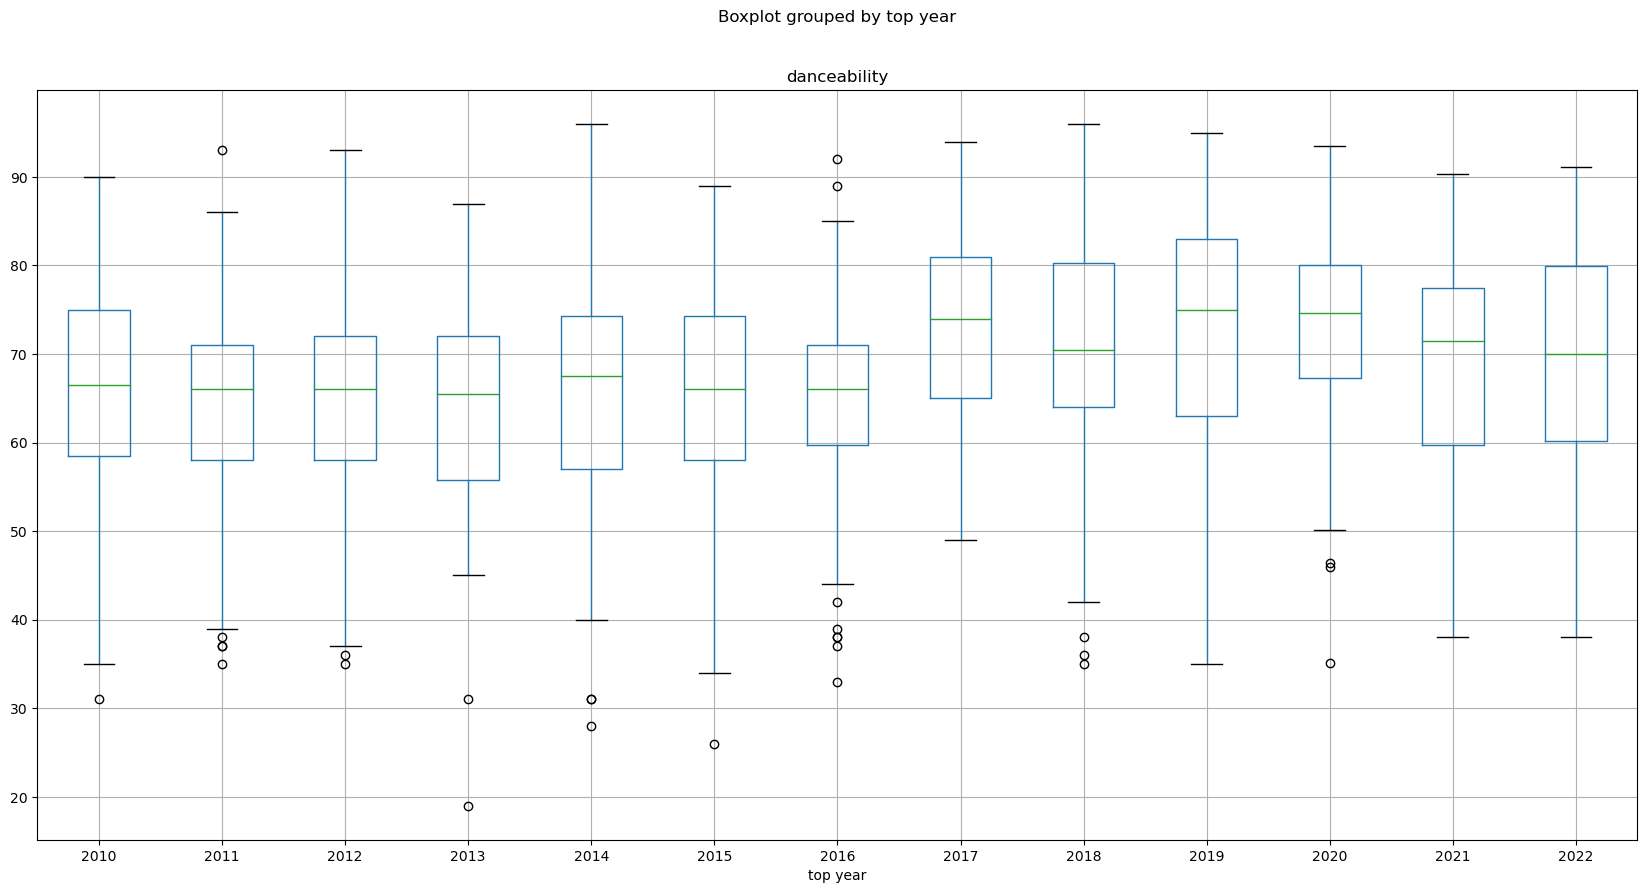

In [6]:
#anova test danceability
all_years_df.boxplot("danceability", by="top year", figsize=(20, 10))
group0 = all_years_df[all_years_df["top year"] == 2010]["danceability"]
group1 = all_years_df[all_years_df["top year"] == 2011]["danceability"]
group2 = all_years_df[all_years_df["top year"] == 2012]["danceability"]
group3 = all_years_df[all_years_df["top year"] == 2013]["danceability"]
group4 = all_years_df[all_years_df["top year"] == 2014]["danceability"]
group5 = all_years_df[all_years_df["top year"] == 2015]["danceability"]
group6 = all_years_df[all_years_df["top year"] == 2016]["danceability"]
group7 = all_years_df[all_years_df["top year"] == 2017]["danceability"]
group8 = all_years_df[all_years_df["top year"] == 2018]["danceability"]
group9 = all_years_df[all_years_df["top year"] == 2019]["danceability"]
group10 = all_years_df[all_years_df["top year"] == 2020]["danceability"]
group11 = all_years_df[all_years_df["top year"] == 2021]["danceability"]
group12 = all_years_df[all_years_df["top year"] == 2022]["danceability"]

stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10,group11,group12)

F_onewayResult(statistic=1.0264097019938587, pvalue=0.42154902566194724)

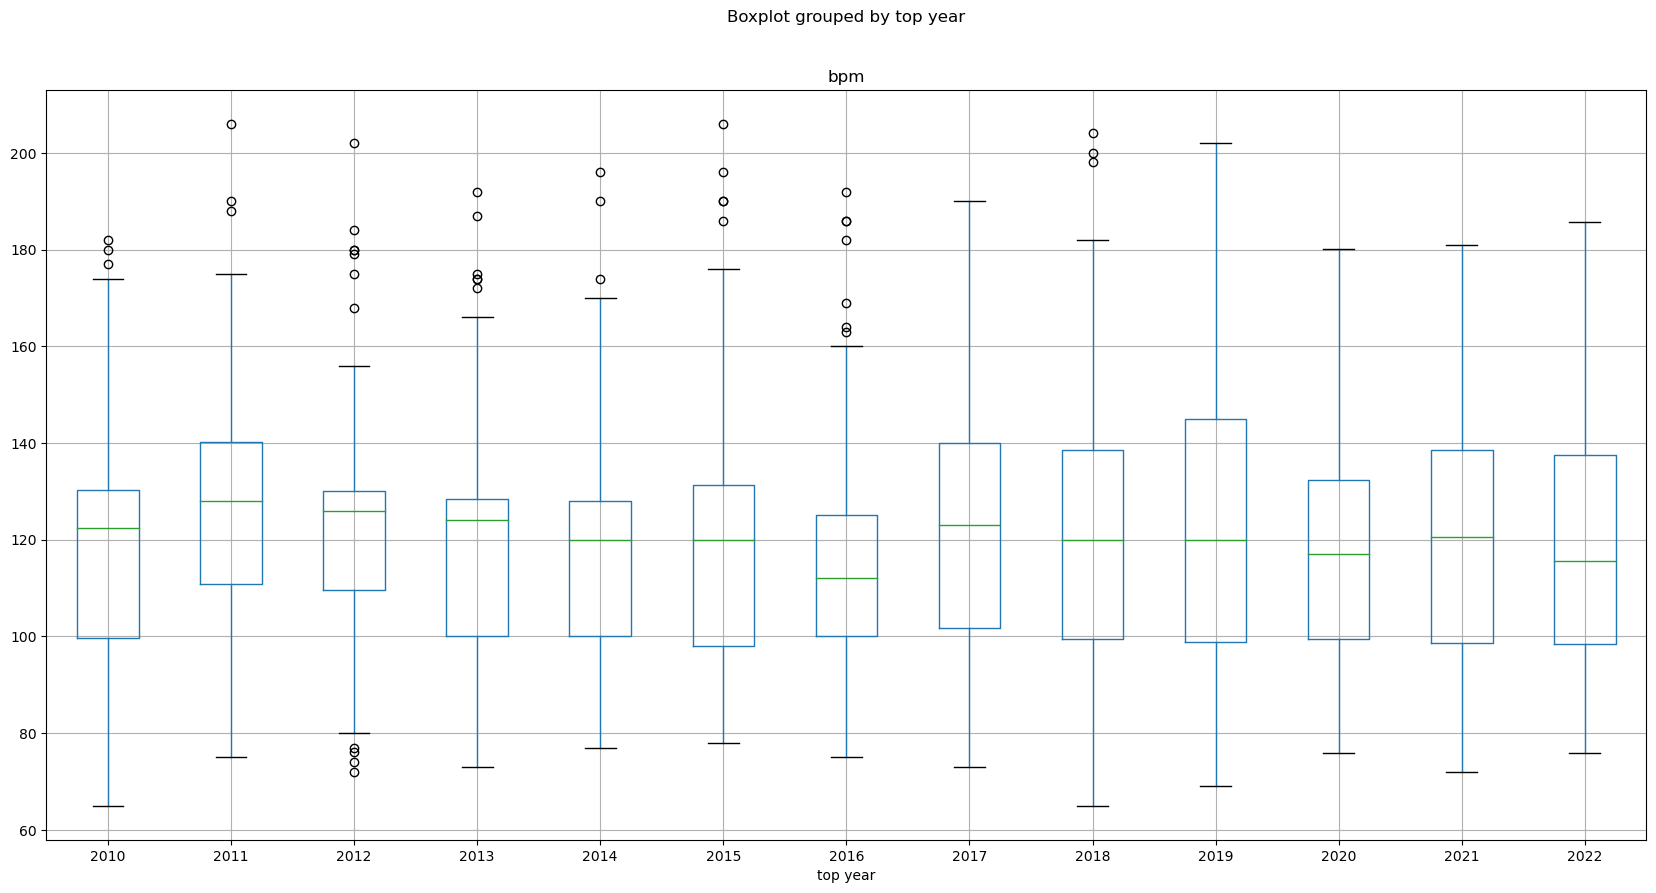

In [7]:
#anova test bpm
all_years_df.boxplot("bpm", by="top year", figsize=(20, 10))
group0 = all_years_df[all_years_df["top year"] == 2010]["bpm"]
group1 = all_years_df[all_years_df["top year"] == 2011]["bpm"]
group2 = all_years_df[all_years_df["top year"] == 2012]["bpm"]
group3 = all_years_df[all_years_df["top year"] == 2013]["bpm"]
group4 = all_years_df[all_years_df["top year"] == 2014]["bpm"]
group5 = all_years_df[all_years_df["top year"] == 2015]["bpm"]
group6 = all_years_df[all_years_df["top year"] == 2016]["bpm"]
group7 = all_years_df[all_years_df["top year"] == 2017]["bpm"]
group8 = all_years_df[all_years_df["top year"] == 2018]["bpm"]
group9 = all_years_df[all_years_df["top year"] == 2019]["bpm"]
group10 = all_years_df[all_years_df["top year"] == 2020]["bpm"]
group11 = all_years_df[all_years_df["top year"] == 2021]["bpm"]
group12 = all_years_df[all_years_df["top year"] == 2022]["bpm"]

stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10,group11,group12)

F_onewayResult(statistic=10.579157905573922, pvalue=4.137698311741031e-20)

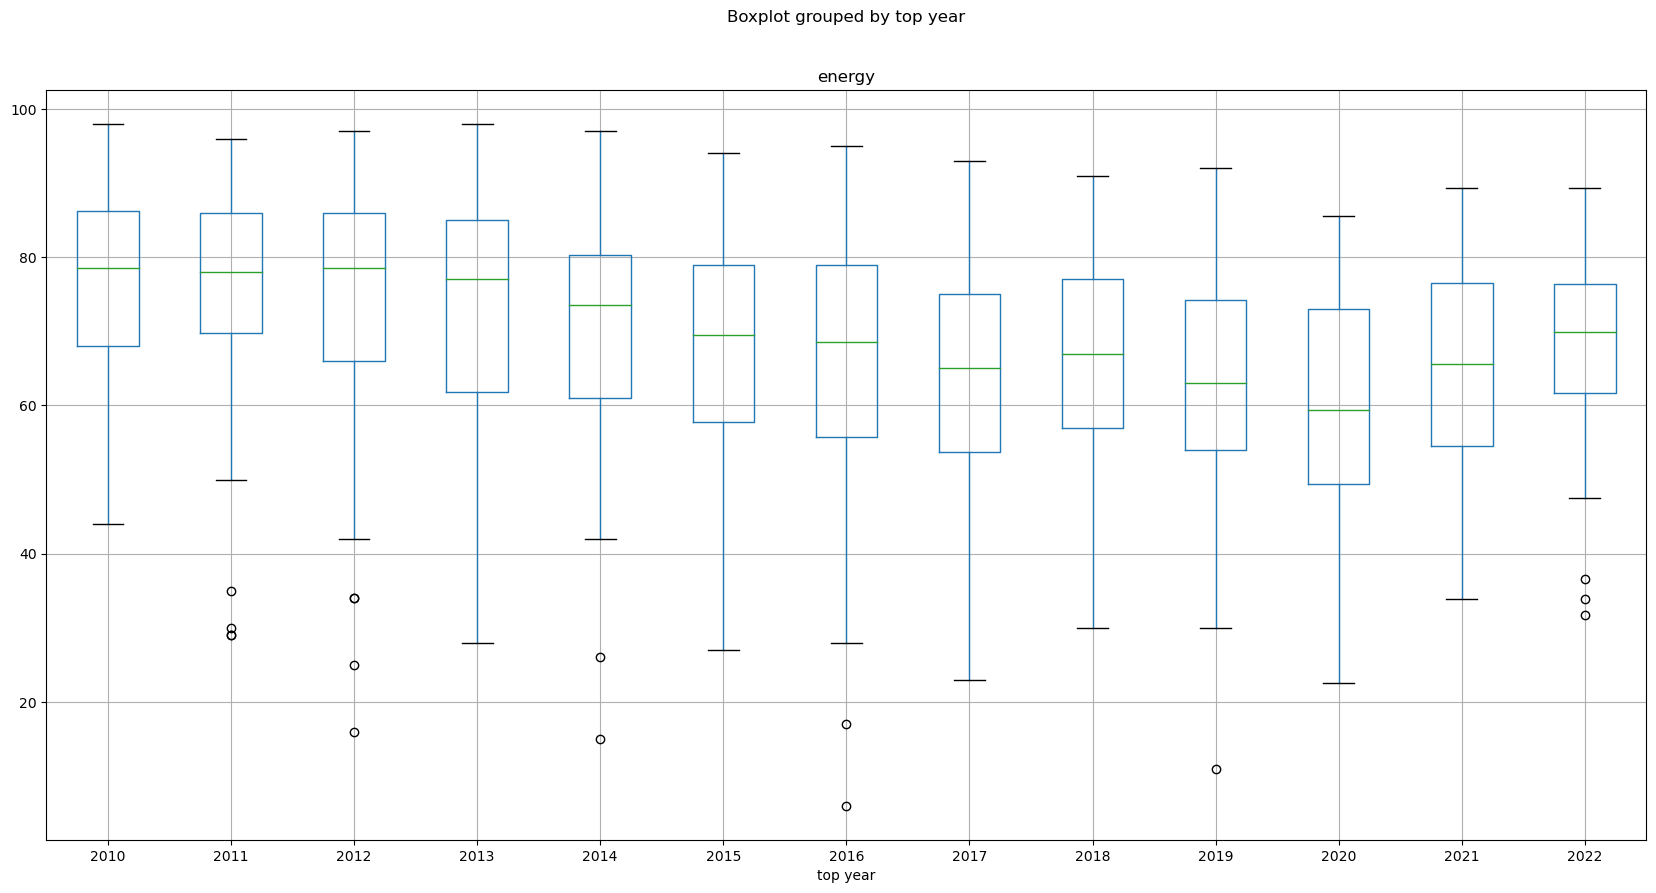

In [8]:
#anova test energy
all_years_df.boxplot("energy", by="top year", figsize=(20, 10))
group0 = all_years_df[all_years_df["top year"] == 2010]["energy"]
group1 = all_years_df[all_years_df["top year"] == 2011]["energy"]
group2 = all_years_df[all_years_df["top year"] == 2012]["energy"]
group3 = all_years_df[all_years_df["top year"] == 2013]["energy"]
group4 = all_years_df[all_years_df["top year"] == 2014]["energy"]
group5 = all_years_df[all_years_df["top year"] == 2015]["energy"]
group6 = all_years_df[all_years_df["top year"] == 2016]["energy"]
group7 = all_years_df[all_years_df["top year"] == 2017]["energy"]
group8 = all_years_df[all_years_df["top year"] == 2018]["energy"]
group9 = all_years_df[all_years_df["top year"] == 2019]["energy"]
group10 = all_years_df[all_years_df["top year"] == 2020]["energy"]
group11 = all_years_df[all_years_df["top year"] == 2021]["energy"]
group12 = all_years_df[all_years_df["top year"] == 2022]["energy"]

stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10,group11,group12)

F_onewayResult(statistic=3.3273619767559195, pvalue=8.987708098396248e-05)

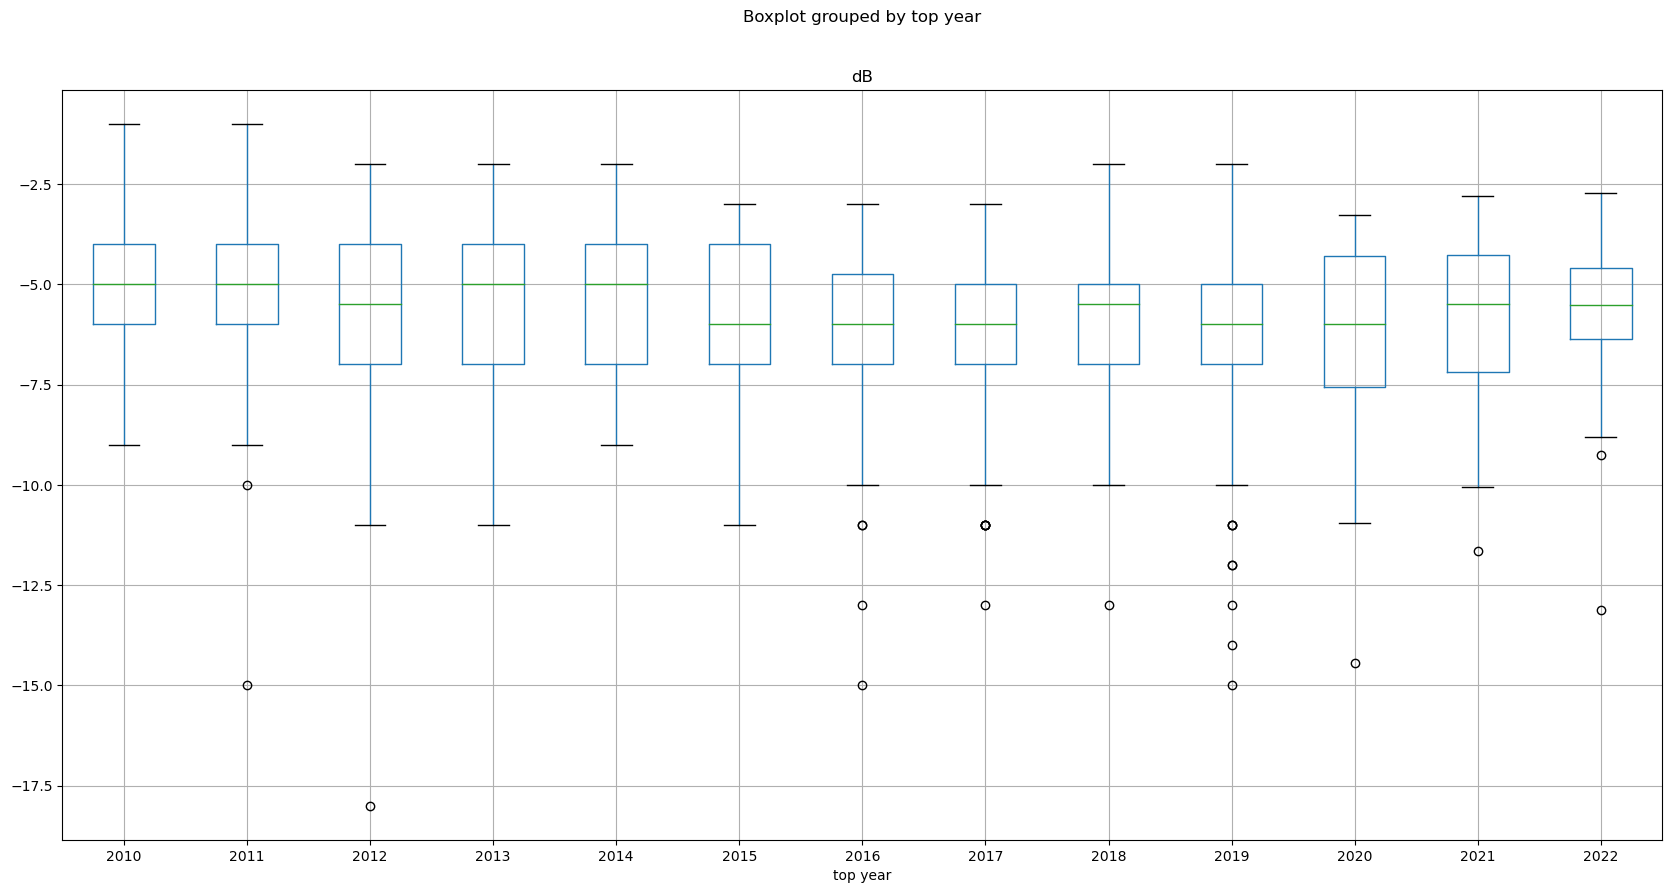

In [9]:
#anova test db
all_years_df.boxplot("dB", by="top year", figsize=(20, 10))
group0 = all_years_df[all_years_df["top year"] == 2010]["dB"]
group1 = all_years_df[all_years_df["top year"] == 2011]["dB"]
group2 = all_years_df[all_years_df["top year"] == 2012]["dB"]
group3 = all_years_df[all_years_df["top year"] == 2013]["dB"]
group4 = all_years_df[all_years_df["top year"] == 2014]["dB"]
group5 = all_years_df[all_years_df["top year"] == 2015]["dB"]
group6 = all_years_df[all_years_df["top year"] == 2016]["dB"]
group7 = all_years_df[all_years_df["top year"] == 2017]["dB"]
group8 = all_years_df[all_years_df["top year"] == 2018]["dB"]
group9 = all_years_df[all_years_df["top year"] == 2019]["dB"]
group10 = all_years_df[all_years_df["top year"] == 2020]["dB"]
group11 = all_years_df[all_years_df["top year"] == 2021]["dB"]
group12 = all_years_df[all_years_df["top year"] == 2022]["dB"]

stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10,group11,group12)

F_onewayResult(statistic=2.2765007521800604, pvalue=0.007441977559220464)

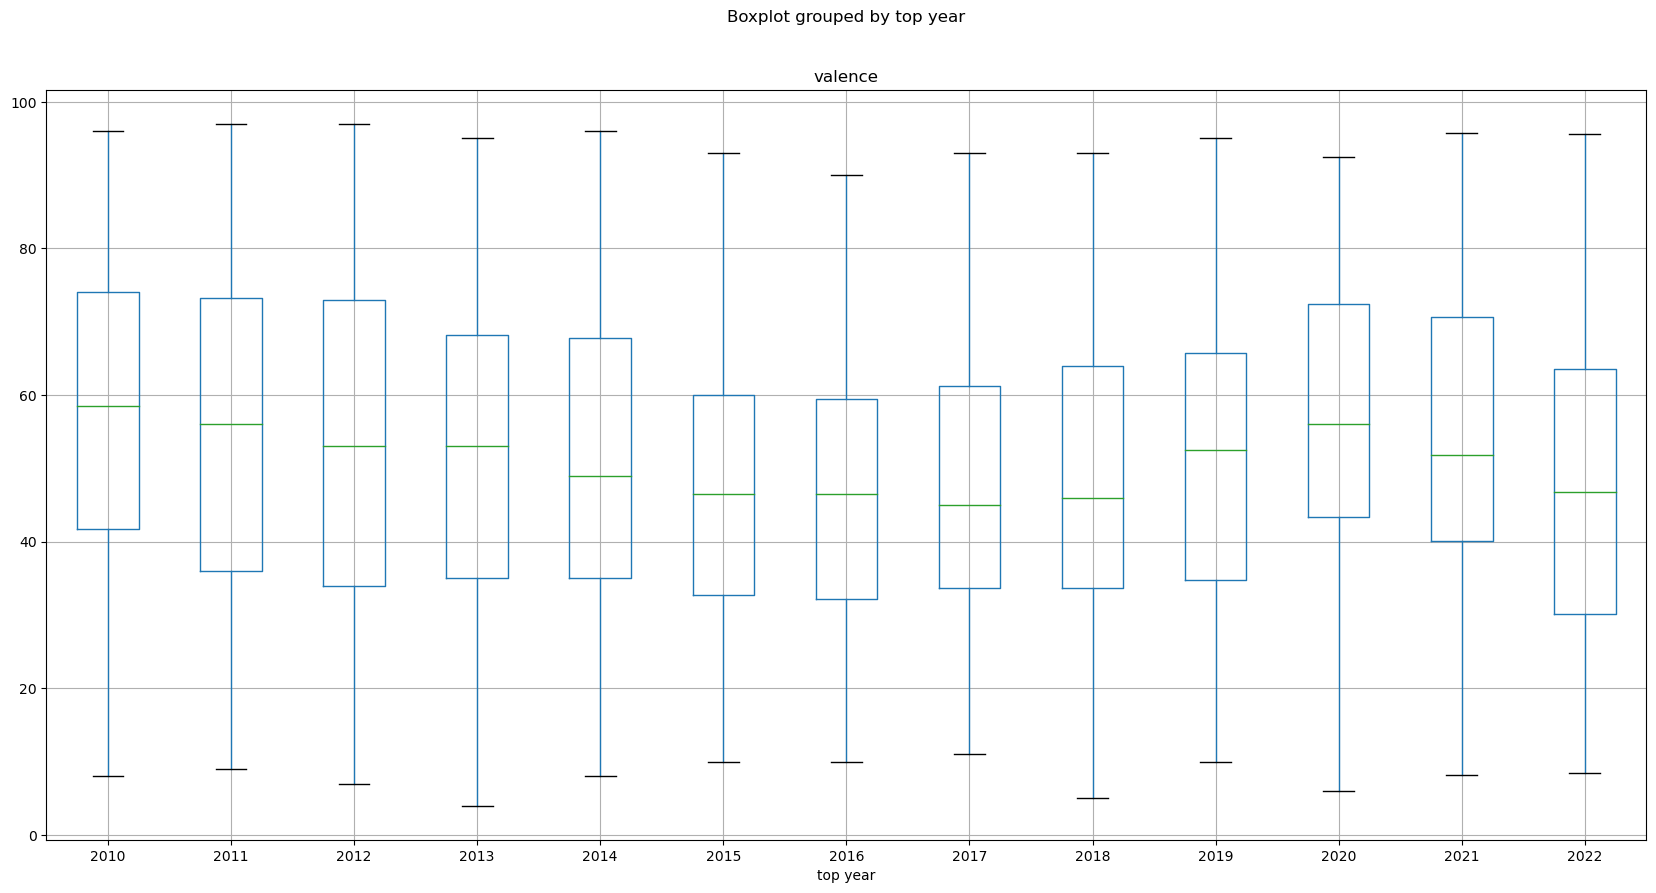

In [10]:
#anova test valence
all_years_df.boxplot("valence", by="top year", figsize=(20, 10))
group0 = all_years_df[all_years_df["top year"] == 2010]["valence"]
group1 = all_years_df[all_years_df["top year"] == 2011]["valence"]
group2 = all_years_df[all_years_df["top year"] == 2012]["valence"]
group3 = all_years_df[all_years_df["top year"] == 2013]["valence"]
group4 = all_years_df[all_years_df["top year"] == 2014]["valence"]
group5 = all_years_df[all_years_df["top year"] == 2015]["valence"]
group6 = all_years_df[all_years_df["top year"] == 2016]["valence"]
group7 = all_years_df[all_years_df["top year"] == 2017]["valence"]
group8 = all_years_df[all_years_df["top year"] == 2018]["valence"]
group9 = all_years_df[all_years_df["top year"] == 2019]["valence"]
group10 = all_years_df[all_years_df["top year"] == 2020]["valence"]
group11 = all_years_df[all_years_df["top year"] == 2021]["valence"]
group12 = all_years_df[all_years_df["top year"] == 2022]["valence"]

stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10,group11,group12)

F_onewayResult(statistic=5.971111471374325, pvalue=3.5064550210664056e-10)

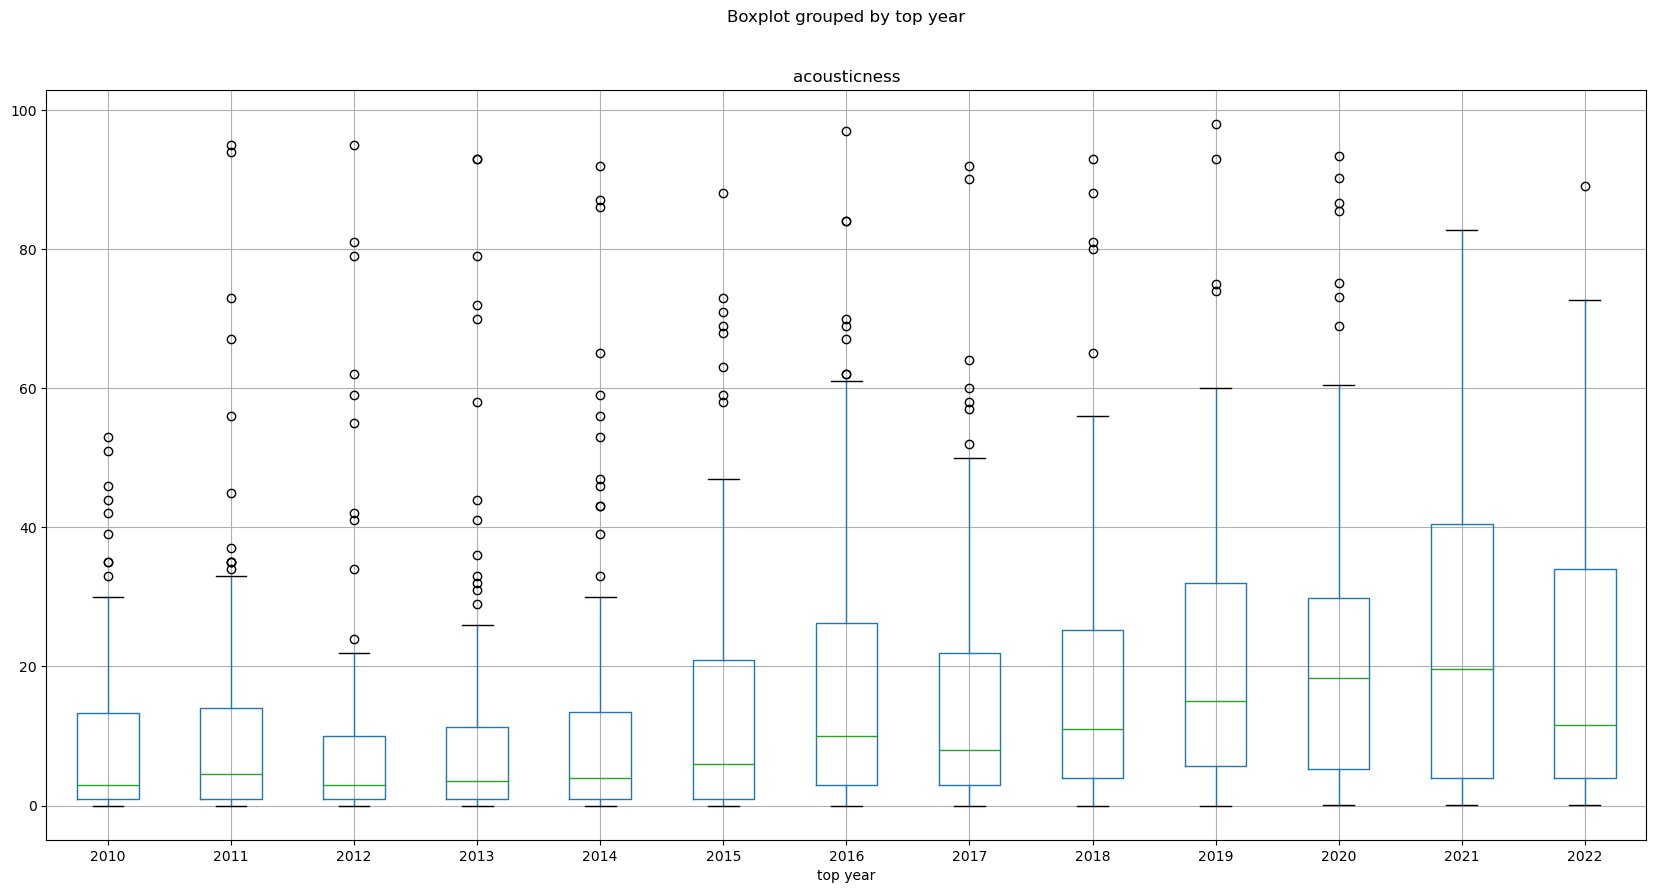

In [11]:
#anova test acousticness
all_years_df.boxplot("acousticness", by="top year", figsize=(20, 10))
group0 = all_years_df[all_years_df["top year"] == 2010]["acousticness"]
group1 = all_years_df[all_years_df["top year"] == 2011]["acousticness"]
group2 = all_years_df[all_years_df["top year"] == 2012]["acousticness"]
group3 = all_years_df[all_years_df["top year"] == 2013]["acousticness"]
group4 = all_years_df[all_years_df["top year"] == 2014]["acousticness"]
group5 = all_years_df[all_years_df["top year"] == 2015]["acousticness"]
group6 = all_years_df[all_years_df["top year"] == 2016]["acousticness"]
group7 = all_years_df[all_years_df["top year"] == 2017]["acousticness"]
group8 = all_years_df[all_years_df["top year"] == 2018]["acousticness"]
group9 = all_years_df[all_years_df["top year"] == 2019]["acousticness"]
group10 = all_years_df[all_years_df["top year"] == 2020]["acousticness"]
group11 = all_years_df[all_years_df["top year"] == 2021]["acousticness"]
group12 = all_years_df[all_years_df["top year"] == 2022]["acousticness"]

stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10,group11,group12)

F_onewayResult(statistic=9.132869701597874, pvalue=5.583451745106754e-17)

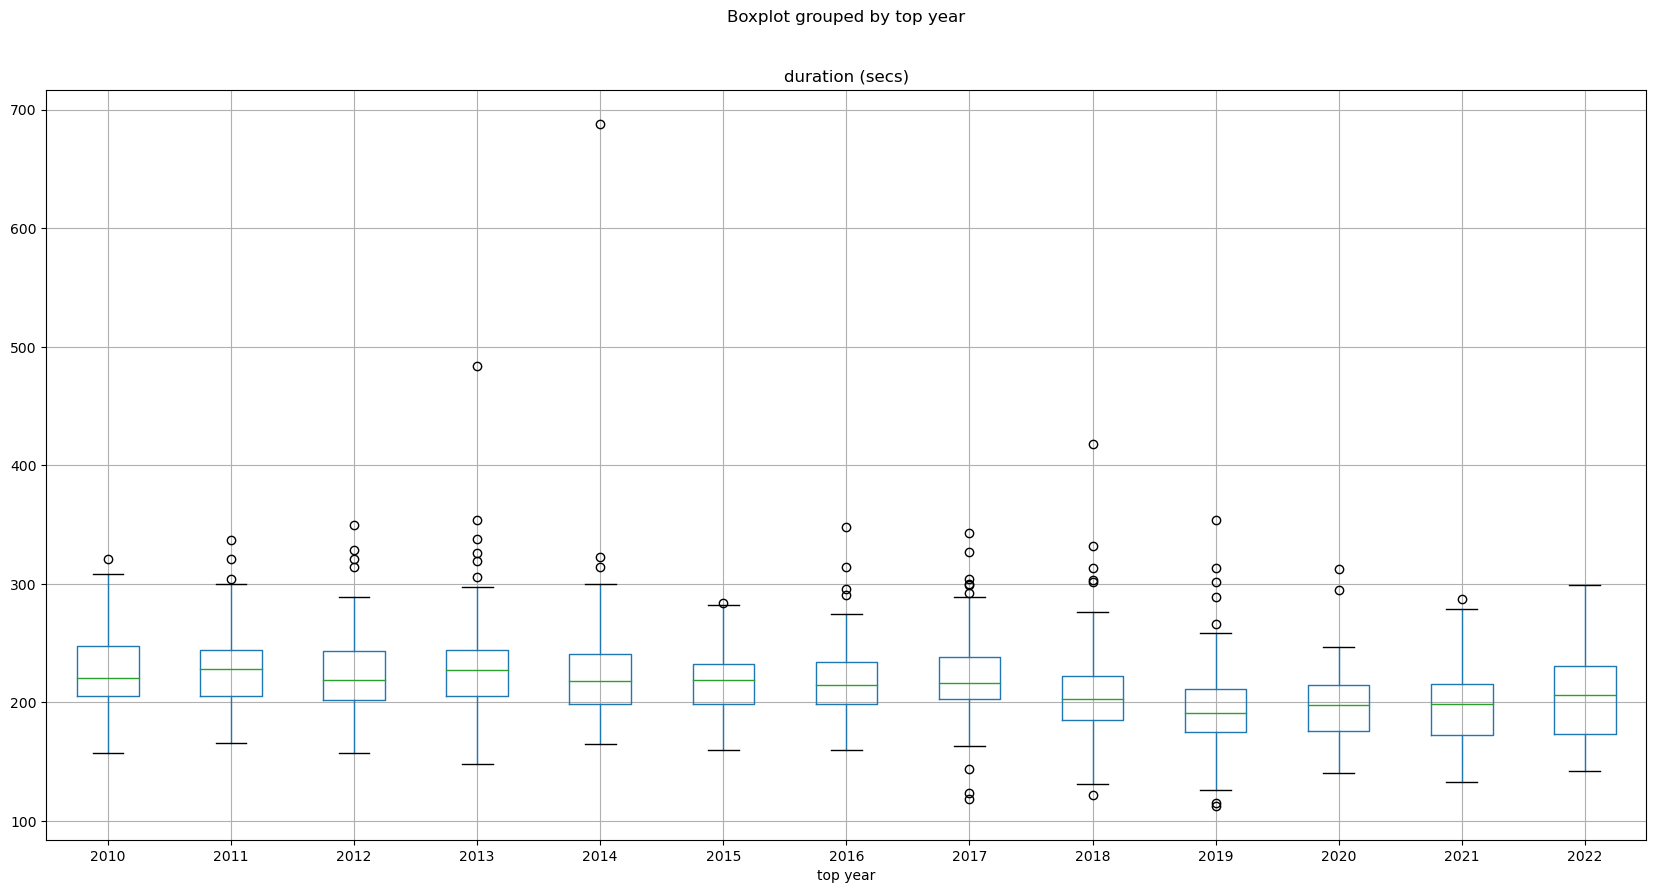

In [12]:
#anova test duration (secs)
all_years_df.boxplot("duration (secs)", by="top year", figsize=(20, 10))
group0 = all_years_df[all_years_df["top year"] == 2010]["duration (secs)"]
group1 = all_years_df[all_years_df["top year"] == 2011]["duration (secs)"]
group2 = all_years_df[all_years_df["top year"] == 2012]["duration (secs)"]
group3 = all_years_df[all_years_df["top year"] == 2013]["duration (secs)"]
group4 = all_years_df[all_years_df["top year"] == 2014]["duration (secs)"]
group5 = all_years_df[all_years_df["top year"] == 2015]["duration (secs)"]
group6 = all_years_df[all_years_df["top year"] == 2016]["duration (secs)"]
group7 = all_years_df[all_years_df["top year"] == 2017]["duration (secs)"]
group8 = all_years_df[all_years_df["top year"] == 2018]["duration (secs)"]
group9 = all_years_df[all_years_df["top year"] == 2019]["duration (secs)"]
group10 = all_years_df[all_years_df["top year"] == 2020]["duration (secs)"]
group11 = all_years_df[all_years_df["top year"] == 2021]["duration (secs)"]
group12 = all_years_df[all_years_df["top year"] == 2022]["duration (secs)"]

stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10,group11,group12)

F_onewayResult(statistic=24.38857729411112, pvalue=5.321314060921362e-49)

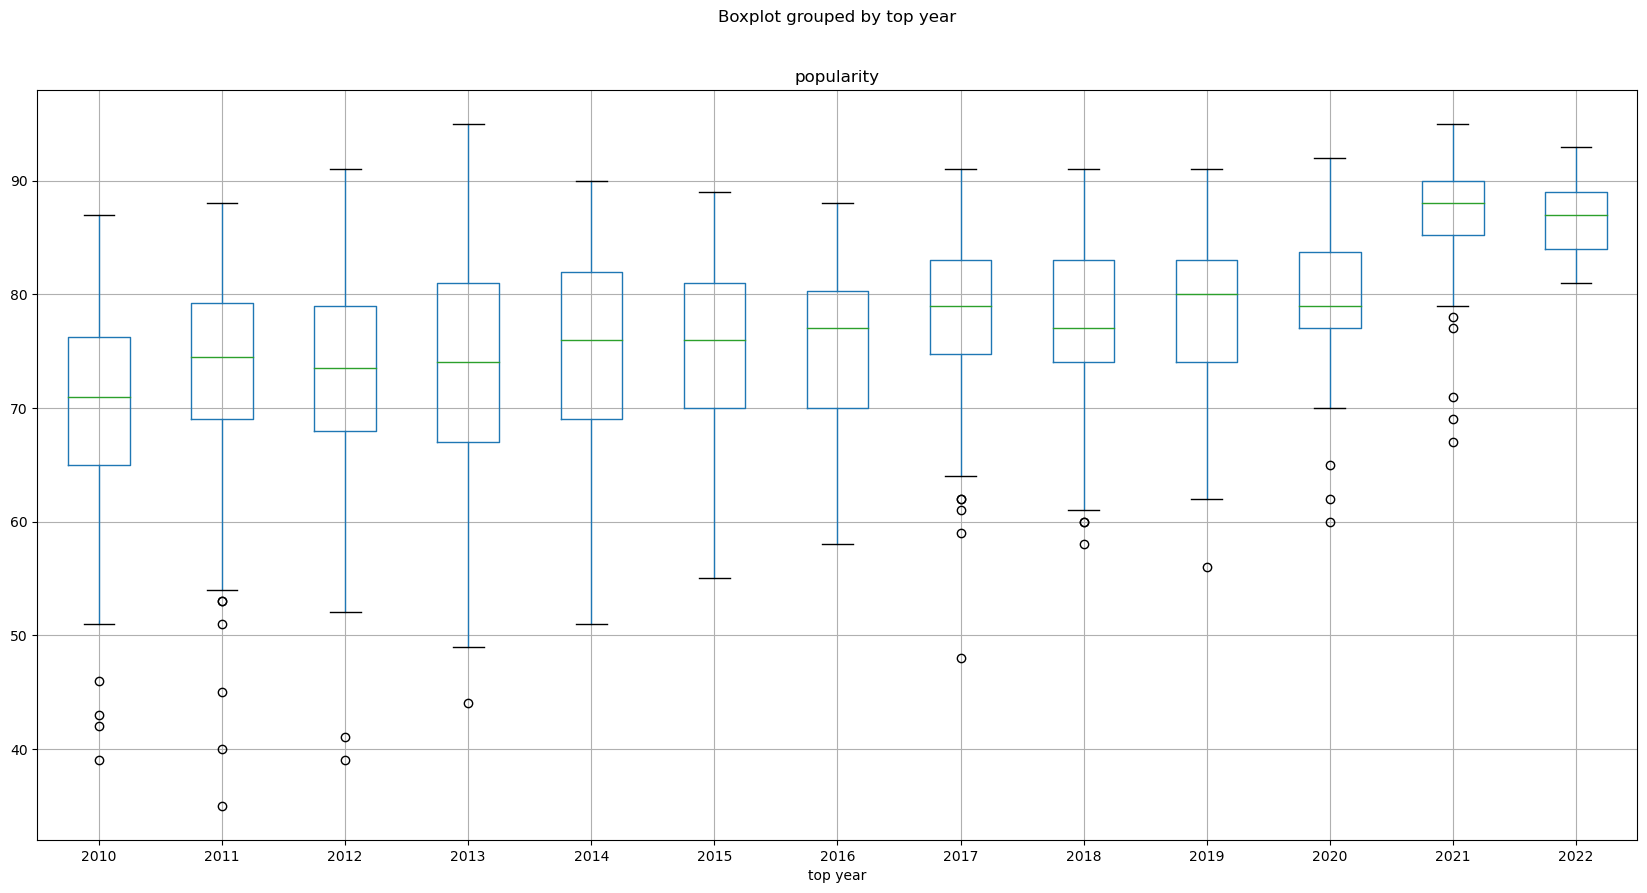

In [13]:
#anova test popularity
all_years_df.boxplot("popularity", by="top year", figsize=(20, 10))
group0 = all_years_df[all_years_df["top year"] == 2010]["popularity"]
group1 = all_years_df[all_years_df["top year"] == 2011]["popularity"]
group2 = all_years_df[all_years_df["top year"] == 2012]["popularity"]
group3 = all_years_df[all_years_df["top year"] == 2013]["popularity"]
group4 = all_years_df[all_years_df["top year"] == 2014]["popularity"]
group5 = all_years_df[all_years_df["top year"] == 2015]["popularity"]
group6 = all_years_df[all_years_df["top year"] == 2016]["popularity"]
group7 = all_years_df[all_years_df["top year"] == 2017]["popularity"]
group8 = all_years_df[all_years_df["top year"] == 2018]["popularity"]
group9 = all_years_df[all_years_df["top year"] == 2019]["popularity"]
group10 = all_years_df[all_years_df["top year"] == 2020]["popularity"]
group11 = all_years_df[all_years_df["top year"] == 2021]["popularity"]
group12 = all_years_df[all_years_df["top year"] == 2022]["popularity"]

stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10,group11,group12)

In [14]:
#function to create scatter plot with linear regression
def get_regression_plot(x_values,y_values):
    plt.scatter(x_values,y_values)
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,xy=(0, 1), xytext=(5, -5), va='top',
             xycoords='axes fraction', textcoords='offset points',fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")
    plt.show()

The r-value is: 0.16954865031450383


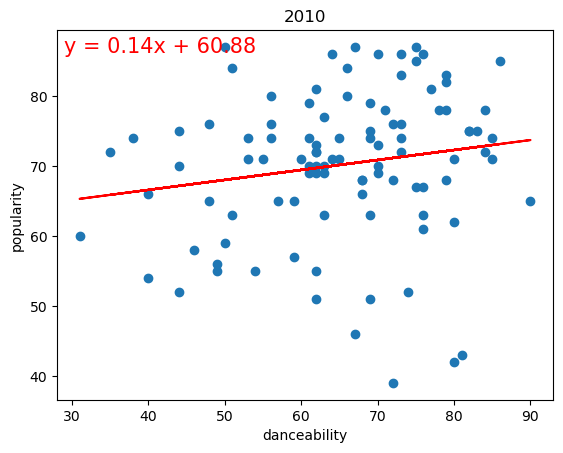

The r-value is: 0.09094569322352215


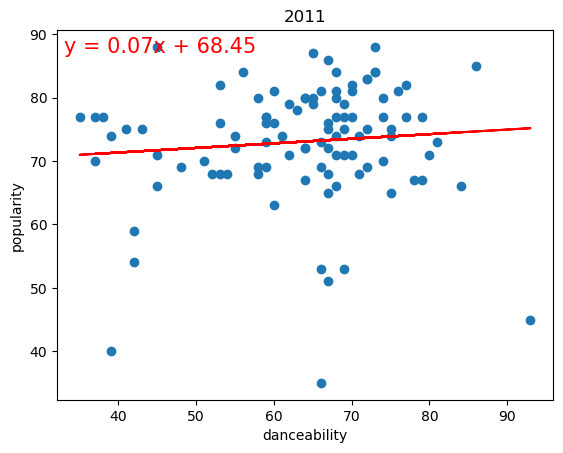

The r-value is: 0.28858115175395777


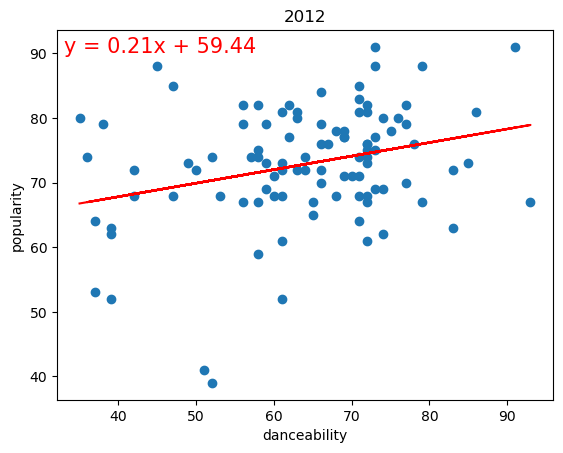

The r-value is: -0.08774642351905482


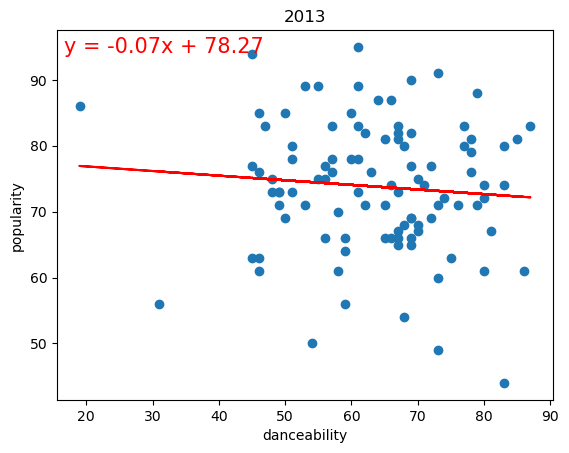

The r-value is: 0.00014623715315386626


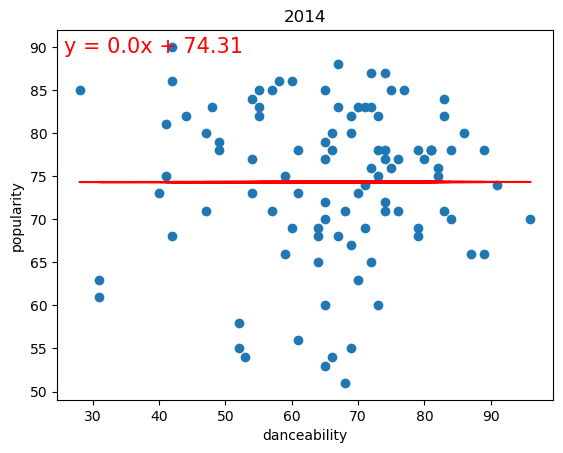

The r-value is: 0.04547952690782761


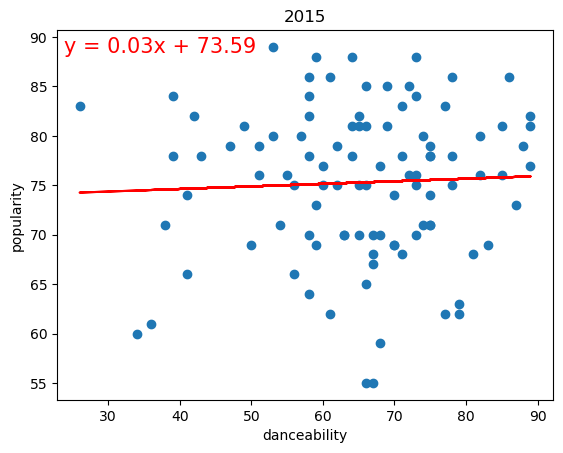

The r-value is: -0.04077670138703654


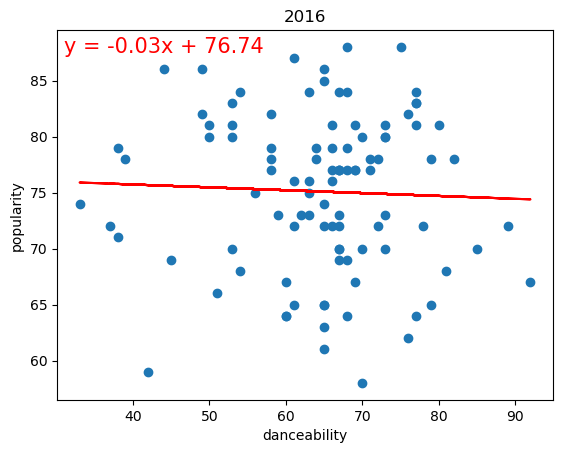

The r-value is: 0.06533860798051223


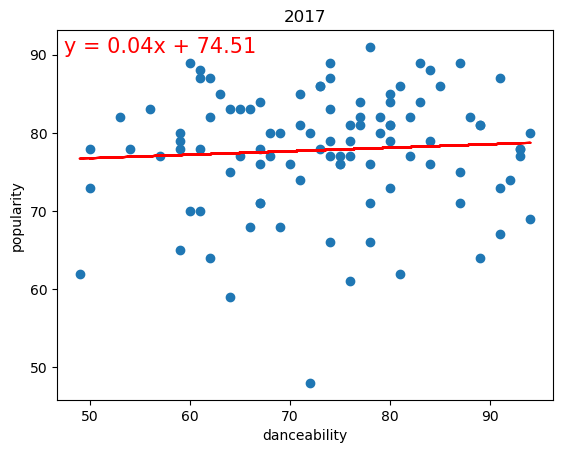

The r-value is: -0.07175640551122828


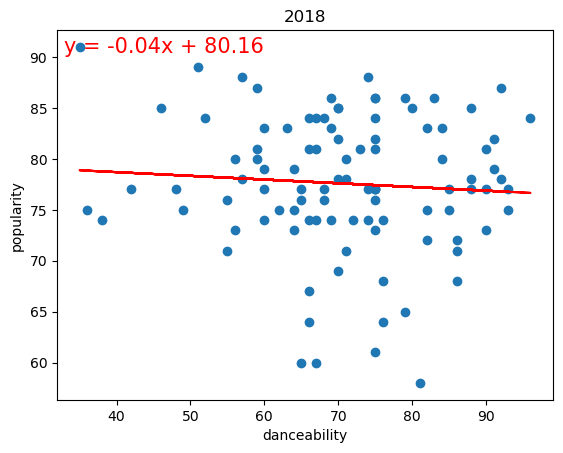

The r-value is: -0.2163811742886246


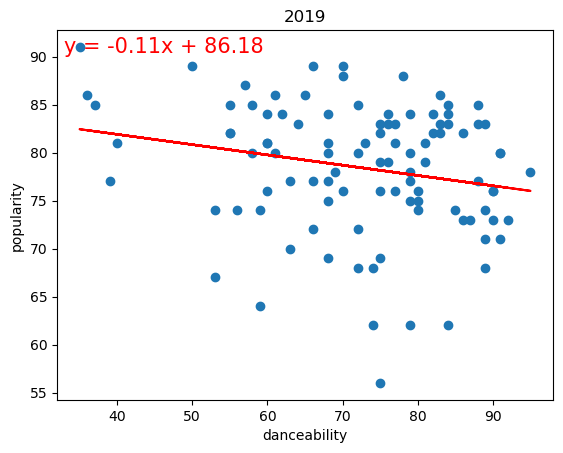

In [15]:
#function to get scatter/regression for desired attribute over 2010s
def get_2010s_attributes(attribute):
    years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
    for year in years:
        x_values = all_years_df[all_years_df["top year"] == year][attribute]
        y_values = all_years_df[all_years_df["top year"] == year]["popularity"]
        plt.title(year)
        get_regression_plot(x_values,y_values)
get_2010s_attributes('danceability')   

In [16]:
#data frame for only 2010s data
average_2010s = all_years_df.loc[all_years_df['top year'] < 2020,:]
average_2010s

,Song Title,Artist,bpm,energy,danceability,dB,valence,duration (secs),acousticness,speechiness,popularity,top year,duration (ms)
0,STARSTRUKK (feat. Katy Perry),3OH!3,140.0,81.0,61.0,-6.0,23.0,203.0,0.0,6.0,70.0,2010,203000.0
1,My First Kiss (feat. Ke$ha),3OH!3,138.0,89.0,68.0,-4.0,83.0,192.0,1.0,8.0,68.0,2010,192000.0
2,I Need A Dollar,Aloe Blacc,95.0,48.0,84.0,-7.0,96.0,243.0,20.0,3.0,72.0,2010,243000.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,93.0,87.0,66.0,-4.0,38.0,180.0,11.0,12.0,80.0,2010,180000.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,104.0,85.0,69.0,-6.0,74.0,268.0,39.0,5.0,79.0,2010,268000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,155.0,73.0,83.0,-4.0,45.0,313.0,1.0,22.0,86.0,2019,313000.0
996,EARFQUAKE,"Tyler, The Creator",80.0,50.0,55.0,-9.0,41.0,190.0,23.0,7.0,85.0,2019,190000.0
997,Boasty (feat. Idris Elba),Wiley,103.0,77.0,89.0,-5.0,46.0,177.0,1.0,7.0,68.0,2019,177000.0
998,Strike a Pose (feat. Aitch),Young T & Bugsey,138.0,58.0,53.0,-6.0,59.0,214.0,1.0,10.0,67.0,2019,214000.0


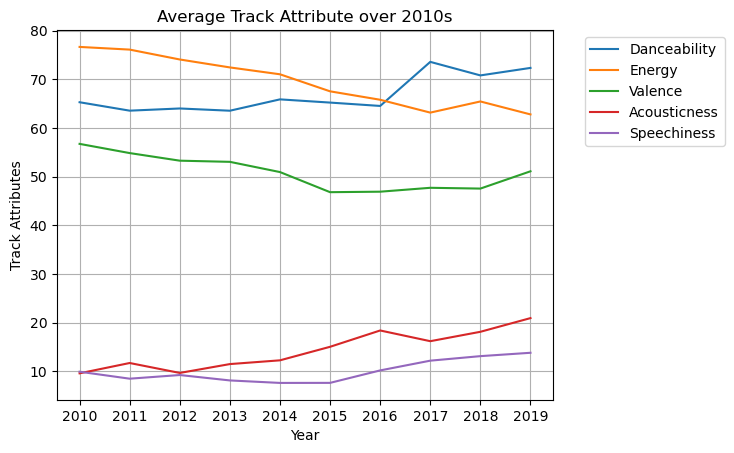

In [17]:
#caluculating averages for 2010s per attribute
average_danceability_2010s = average_2010s.groupby('top year')['danceability'].mean()
average_energy_2010s = average_2010s.groupby('top year')['energy'].mean()
average_dB_2010s = average_2010s.groupby('top year')['dB'].mean()
average_valence_2010s = average_2010s.groupby('top year')['valence'].mean()
average_duration_secs_2010s = average_2010s.groupby('top year')['duration (secs)'].mean()
average_acousticness_2010s = average_2010s.groupby('top year')['acousticness'].mean()
average_speechiness_2010s = average_2010s.groupby('top year')['speechiness'].mean()

#add averages to a datagrame
grouped_averages_2010s = pd.DataFrame({'Average Danceability':average_danceability_2010s,
                          'Average Energy': average_energy_2010s,
                          'Average Valence':average_valence_2010s,
                          'Average Acousticness':average_acousticness_2010s,
                          'Average Speechiness': average_speechiness_2010s})
#plot 2010s averages
plt.plot(average_danceability_2010s, label = 'Danceability')
plt.plot(average_energy_2010s, label = 'Energy')
plt.plot(average_valence_2010s, label = 'Valence')
plt.plot(average_acousticness_2010s, label = 'Acousticness')
plt.plot(average_speechiness_2010s, label = 'Speechiness')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Track Attributes')
plt.xticks(grouped_averages_2010s.index)
plt.title("Average Track Attribute over 2010s")
plt.legend(bbox_to_anchor=(1.05, 1))


plt.show()

The r-value is: 0.786362135452299


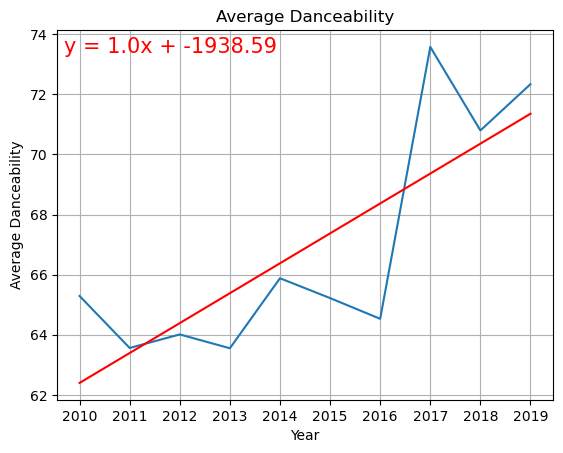

The r-value is: -0.9736165309958008


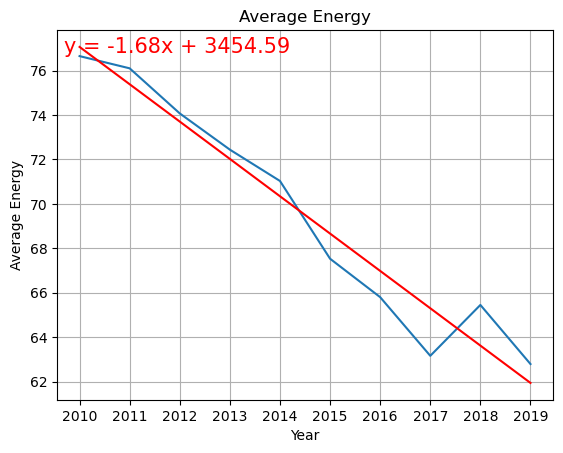

The r-value is: -0.784569337451853


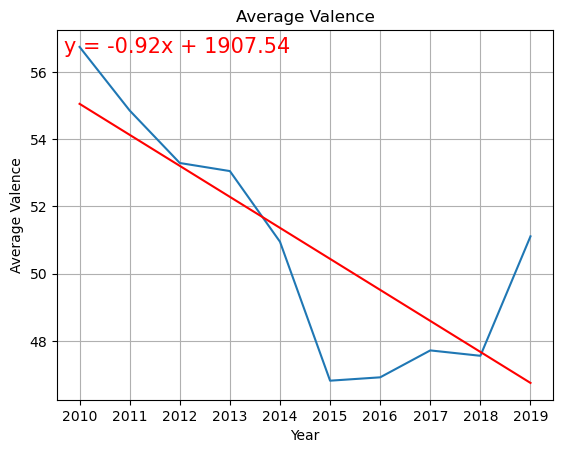

The r-value is: 0.9385778440639175


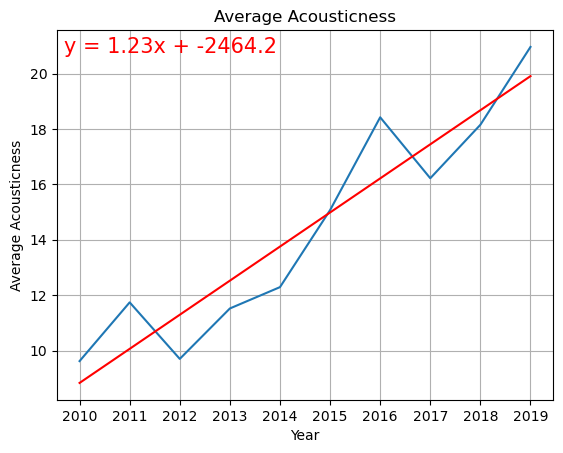

The r-value is: 0.711668612691875


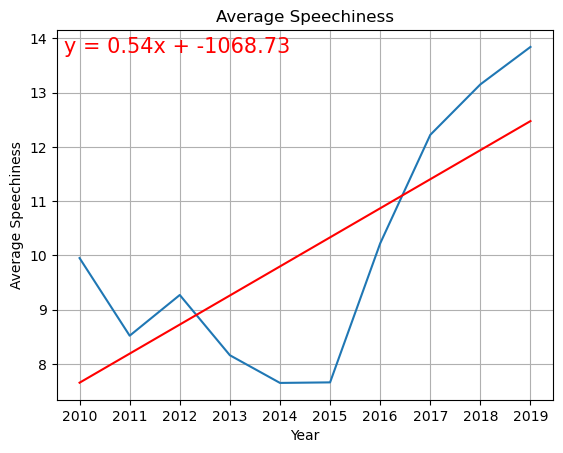

In [18]:
#plot attribute with linear regression 2010s
for column in grouped_averages_2010s:
    plt.plot(grouped_averages_2010s[column])
    x_values = grouped_averages_2010s.index
    y_values = grouped_averages_2010s[column]
    plt.grid()
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.xticks(grouped_averages_2010s.index)
    plt.title(column)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,xy=(0, 1), xytext=(5, -5), va='top',
    xycoords='axes fraction', textcoords='offset points',fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")
    plt.show()

In [19]:
#averages for full data set
average_danceability = all_years_df.groupby('top year')['danceability'].mean()
average_energy = all_years_df.groupby('top year')['energy'].mean()
average_dB = all_years_df.groupby('top year')['dB'].mean()
average_valence = all_years_df.groupby('top year')['valence'].mean()
average_duration_secs = all_years_df.groupby('top year')['duration (secs)'].mean()
average_acousticness = all_years_df.groupby('top year')['acousticness'].mean()
average_speechiness = all_years_df.groupby('top year')['speechiness'].mean()

#data frame for averages of full dataset
grouped_df = pd.DataFrame({'Average Danceability':average_danceability,
                          'Average Energy': average_energy,
                          #'Average dBs' : average_dB,
                          'Average Valence':average_valence,
                           #'Average Duration (secs)': average_duration_secs,
                          'Average Acousticness': average_acousticness,
                          'Average Speechiness': average_speechiness})



grouped_df

,Average Danceability,Average Energy,Average Valence,Average Acousticness,Average Speechiness
top year,,,,,
2010,65.290,76.650,56.7400,9.62000,9.9500
2011,63.560,76.100,54.8500,11.74000,8.5200
2012,64.010,74.070,53.2900,9.70000,9.2700
2013,63.550,72.440,53.0500,11.52000,8.1600
2014,65.880,71.030,50.9500,12.29000,7.6500
2015,65.220,67.530,46.8200,15.07000,7.6600
2016,64.530,65.800,46.9200,18.42000,10.2200
2017,73.580,63.160,47.7200,16.22000,12.2200
2018,70.800,65.450,47.5600,18.15000,13.1500


The r-value is: 0.721122744594845


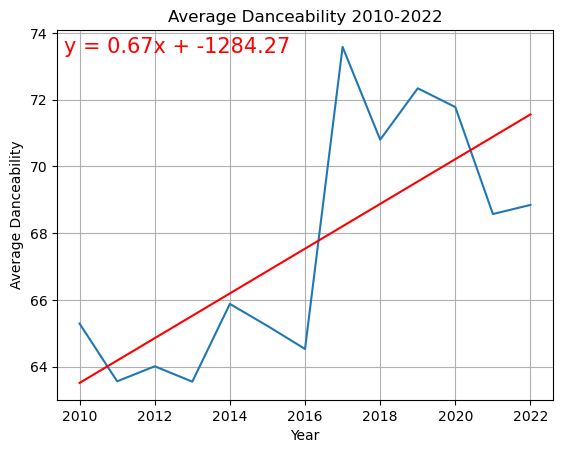

The r-value is: -0.8610693922214061


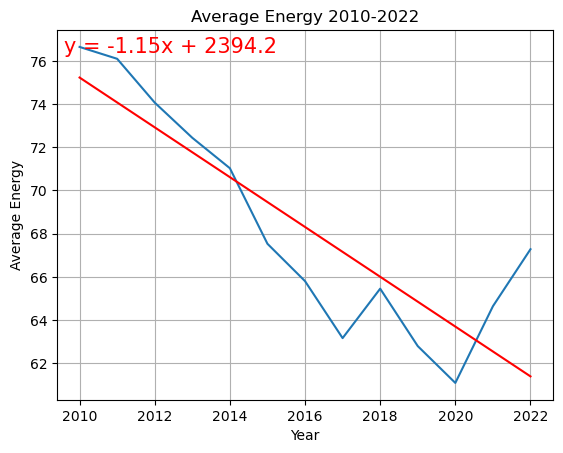

The r-value is: -0.35405232779583934


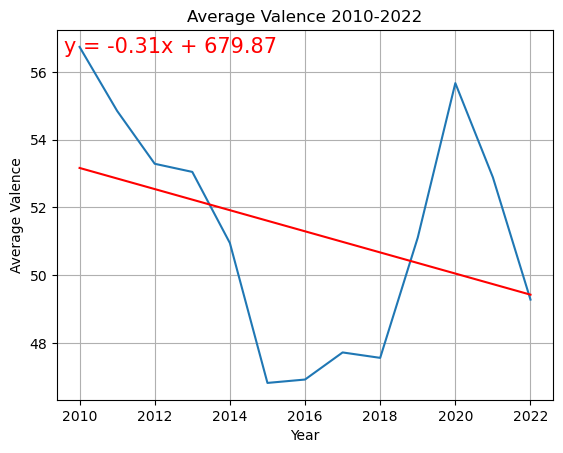

The r-value is: 0.9546657924590448


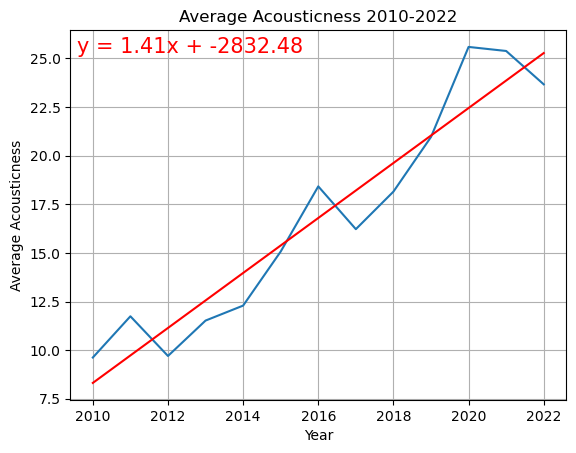

The r-value is: 0.2293491810220849


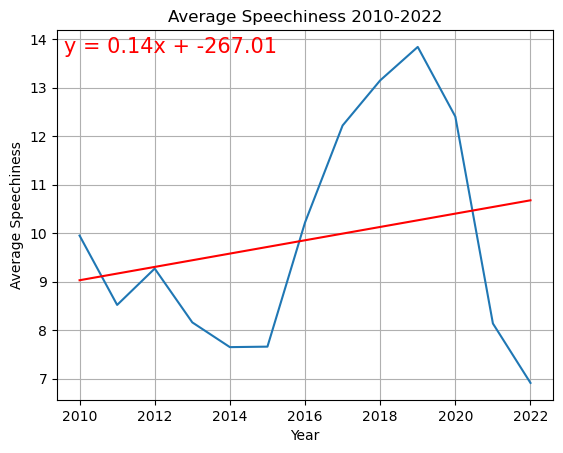

In [20]:
#plot of average of particular attribute over full years range
for column in grouped_df:
    plt.plot(grouped_df[column])
    x_values = grouped_df.index
    y_values = grouped_df[column]
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.grid()
    plt.title(f'{column} 2010-2022')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,xy=(0, 1), xytext=(5, -5), va='top',
    xycoords='axes fraction', textcoords='offset points',fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")
    plt.show()

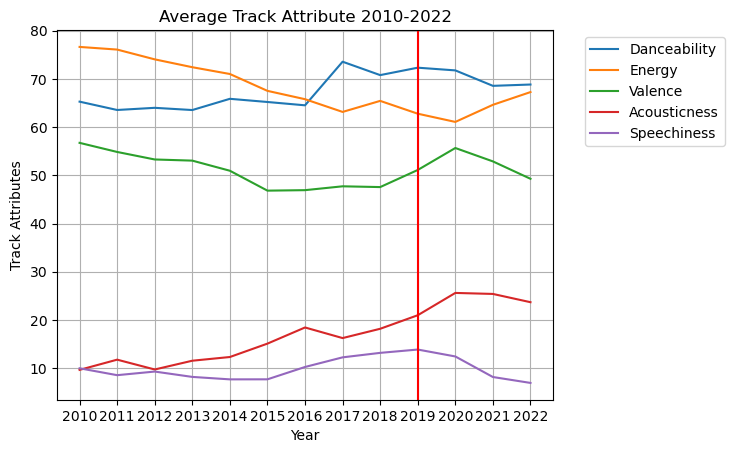

In [21]:
#averages for full data set, marker to note turn of decade/start of covid
plt.plot(average_danceability, label = 'Danceability')
plt.plot(average_energy, label = 'Energy')
plt.plot(average_valence, label = 'Valence')
plt.plot(average_acousticness, label = 'Acousticness')
plt.plot(average_speechiness, label = 'Speechiness')
plt.axvline(x = 2019, color = 'r')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Track Attributes')
plt.xticks(grouped_df.index)
plt.title("Average Track Attribute 2010-2022")
plt.legend(bbox_to_anchor=(1.05, 1))


plt.show()

In [22]:
stats.ttest_ind(tracks_2020s["dB"], tracks_2010s["dB"], equal_var=False)

Ttest_indResult(statistic=-1.700978578931858, pvalue=0.09055760230875061)

In [23]:
stats.ttest_ind(tracks_2020s["energy"], tracks_2010s["energy"], equal_var=False)

Ttest_indResult(statistic=-4.034701029501364, pvalue=7.68192559107923e-05)

In [24]:
stats.ttest_ind(tracks_2020s["danceability"], tracks_2010s["danceability"], equal_var=False)

Ttest_indResult(statistic=2.5332267312300005, pvalue=0.012074368676998713)

In [26]:
stats.ttest_ind(tracks_2020s["bpm"], tracks_2010s["bpm"], equal_var=False)

Ttest_indResult(statistic=-0.3286235264174347, pvalue=0.742800748842484)

In [27]:
stats.ttest_ind(tracks_2020s["valence"], tracks_2010s["valence"], equal_var=False)

Ttest_indResult(statistic=0.8495091039411065, pvalue=0.39666974699104274)

In [28]:
stats.ttest_ind(tracks_2020s["acousticness"], tracks_2010s["acousticness"], equal_var=False)

Ttest_indResult(statistic=4.96836580266203, pvalue=1.5794238877839807e-06)

In [30]:
stats.ttest_ind(tracks_2020s["duration (secs)"], tracks_2010s["duration (secs)"], equal_var=False)

Ttest_indResult(statistic=-6.4572395467875845, pvalue=7.219135909807045e-10)